In [ ]:
!pip3 install autoPyTorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 711 kB 6.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 4.4 MB 41.7 MB/s 
     |████████████████████████████████| 202 kB 54.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 76.8 MB 1.2 MB/s 
     |████████████████████████████████| 4.9 MB 36.8 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
  Created wheel for smac: filename=smac-1.4.0-py3-none-any.whl size=262352 sha256=67cda53a510fec3b41bcff56505877ee4927c3d093469783277569b605a2432e
  Stored in directory: /root/.cache/pip/wheels/70/01/53/

In [ ]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import time
from autoPyTorch.api.tabular_classification import TabularClassificationTask


LOADING DATA

In [ ]:
TrainDataSet= pd.read_csv('../content/train.csv')
TrainDataSet.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


DATA CLEANING

In [ ]:
input_cols = TrainDataSet.columns[:-1]
input_cols

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
target_col =  TrainDataSet.columns[-1]
target_col

'price_range'

In [ ]:
inputs_df = TrainDataSet[list(input_cols)].copy()
inputs_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
targets = TrainDataSet[(target_col)]
targets

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

AUTOML MODEL

In [ ]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

#X_train = torch.from_numpy(X_train)
#X_test = torch.from_numpy(X_test)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
api = TabularClassificationTask()

In [ ]:
start = time.time()
history = api.search(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    optimize_metric='accuracy',
    total_walltime_limit=100,
    func_eval_time_limit_secs=10
)
stop = time.time()
print(f"Training time: {stop - start}s")

[ERROR] [2022-10-31 21:52:41,270:Client-AutoPyTorch:5517deee-5966-11ed-8048-0242ac1c0002:1] Prediction for lgb failed with run state StatusType.CRASHED.
Additional info:
traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/tae.py", line 61, in fit_predict_try_except_decorator
    ta(queue=queue, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 512, in eval_train_function
    evaluator.fit_predict_and_loss()
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 189, in fit_predict_and_loss
    add_pipeline_to_self=True)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 364, in _fit_and_predict
    fit_and_suppress_warnings(self.logger, pipeline, X, y)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/abstract_evaluator.py", line 339, in fit_and_suppress_warnings


/usr/local/lib/python3.7/dist-packages/smac/intensification/parallel_scheduling.py:155: UserWarning: Hyperband is executed with 1 workers only. Consider to use pynisher to use all available workers.
  f"{self.__class__.__name__} is executed with {num_workers} workers only. "


Training time: 120.24453043937683s


In [ ]:
predictions = api.predict(X_test)
#print("Precision", sklearn.metrics.precision_score(y_test, predictions))
#print("Recall", sklearn.metrics.recall_score(y_test, predictions))
#print("Loss", sklearn.metrics.log_loss(y_test, predictions))
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.9325


In [ ]:
print(api.sprint_statistics())

autoPyTorch results:
	Dataset name: 5517deee-5966-11ed-8048-0242ac1c0002
	Optimisation Metric: accuracy
	Best validation score: 0.9659090909090909
	Number of target algorithm runs: 13
	Number of successful target algorithm runs: 7
	Number of crashed target algorithm runs: 3
	Number of target algorithms that exceeded the time limit: 3
	Number of target algorithms that exceeded the memory limit: 0



In [ ]:
score = api.score(y_test, predictions)
print(score)

{'accuracy': 0.9325}


In [ ]:
print(api.show_models())

|    | Preprocessing   | Estimator   |   Weight |
|---:|:----------------|:------------|---------:|
|  0 | None            | SVMLearner  |      0.5 |
|  1 | None            | CBLearner   |      0.2 |
|  2 | None            | KNNLearner  |      0.2 |
|  3 | None            | ETLearner   |      0.1 |


In [ ]:
y_pred = api.predict(X_test)
y_test = np.array(y_test)

error = 0;

for i in range(len(y_test)):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  if(y_test[i] != y_pred[i]):
    error = error + 1;
  print("---------------------------------- ")

error_rate = error  / len(y_test) 
print("Error: ",error_rate)

valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  0.0
---------------------------------- 
valor real:  2.0
valor estimado:  3.0
---------------------------------- 
valor real:  2.0
valor estimado:  2.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  2.0
valor estimado:  2.0
---------------------------------- 
valor real:  2.0
valor estimado:  2.0
---------------------------------- 
valor real:  3.0
valor estimado:  3.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  3.0
valor estimado:  3.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0


[WARNING] [2022-10-31 21:55:53,631:matplotlib.font_manager] findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


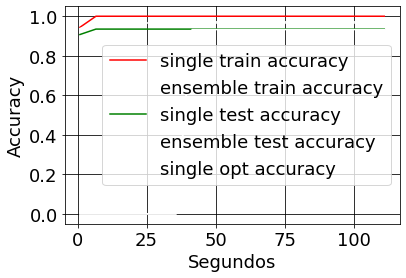

In [ ]:
from autoPyTorch.utils.results_visualizer import PlotSettingParams,ColorLabelSettings
metric_name = 'accuracy'

params = PlotSettingParams(
    #xscale='log',
    xlabel='Segundos',
    ylabel='Accuracy',
    #title='Toy Example',
    
    legend=True,
    figname= None,#'example_plot_over_time.png',
    #savefig_kwargs={'bbox_inches': 'tight'},
    show=True,  # If you would like to show, make it True and set figname=None,

)

api.plot_perf_over_time(
    metric_name=metric_name,
    plot_setting_params=params,
    #marker='*',
    #markersize=10,
    color_label_settings= ColorLabelSettings(single_train=('red', None), single_opt=('white', None), single_test=('green', None), ensemble_train=('white', None), ensemble_test=('white', None))
)
